In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

In [3]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.dates as dates
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

%matplotlib inline

In [3]:
# Load the CSV files
df1 = pd.read_csv('C:\\Users\\malak\\source\\repos\\Sales-Customer-Behavior-Analysis\\Dataset\\2019-Oct.csv')
df2 = pd.read_csv('C:\\Users\\malak\\source\\repos\\Sales-Customer-Behavior-Analysis\\Dataset\\2019-Nov.csv')

# Merge the DataFrames
df = pd.concat([df1, df2], ignore_index=True)

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.4+ GB


In [6]:
df.shape

(109950743, 9)

In [7]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

# Know your Customers
How many customers visit the site?

In [8]:
visitor = df['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 5316649


# Vistors Daily Trend
Does traffic flunctuate by date?

In [9]:
d = df.loc[:,['event_time','user_id']]

In [10]:
def slice_dates_in_chunks(series, chunk_size=10_000_000):
    result = []
    for i in range(0, len(series), chunk_size):
        chunk = series.iloc[i:i+chunk_size].apply(lambda s: str(s)[:10])
        result.append(chunk)
    return pd.concat(result, ignore_index=True)

d['event_time'] = slice_dates_in_chunks(d['event_time'])

In [11]:

visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

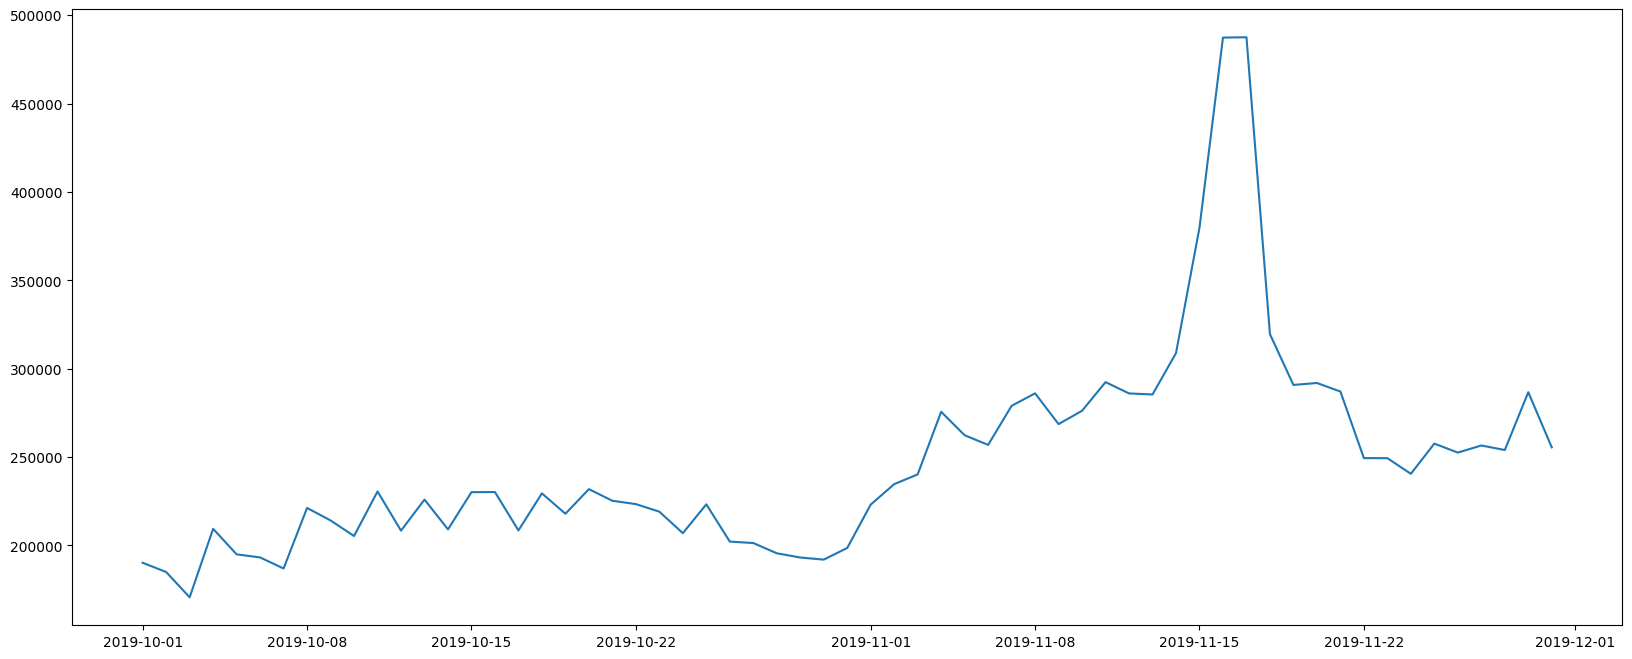

In [12]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

### By Category and Product
Which category customers interact the most? What brand the view to most?

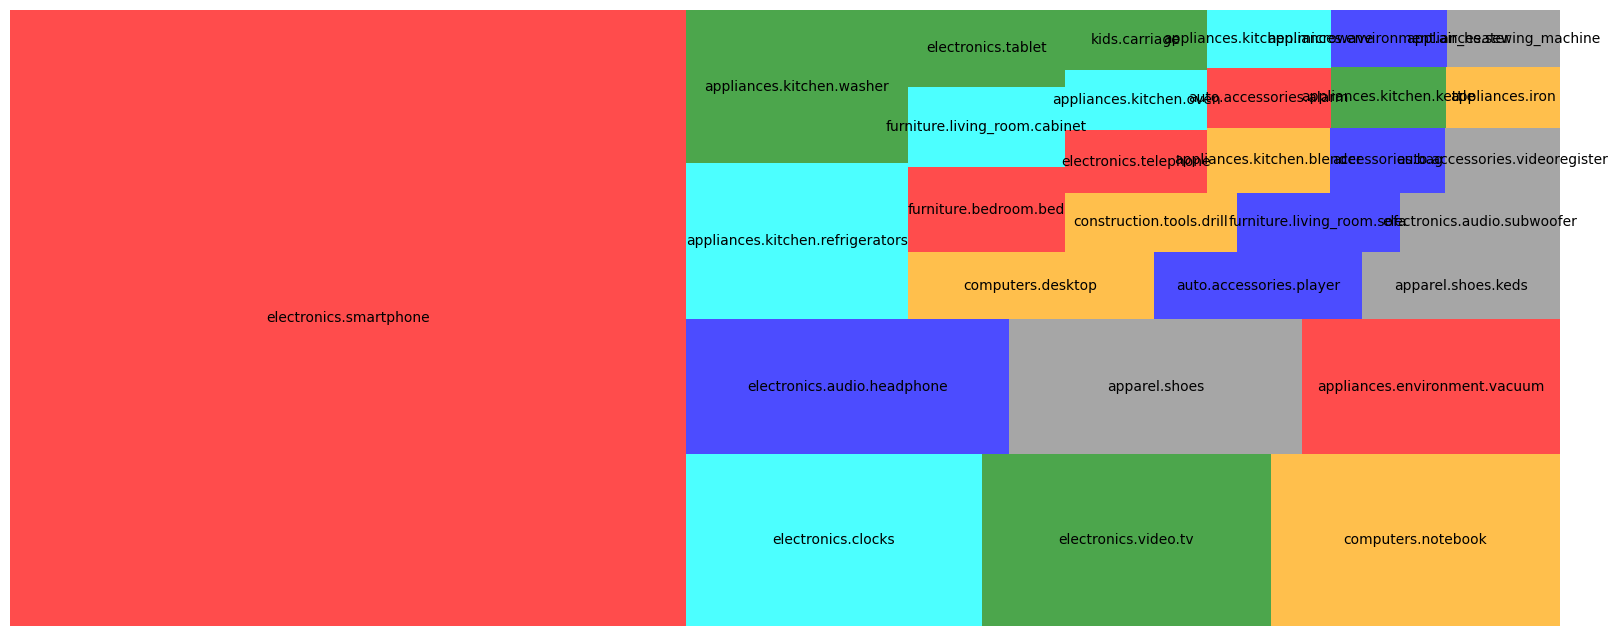

In [13]:
top_category_n = 30
top_category = df.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

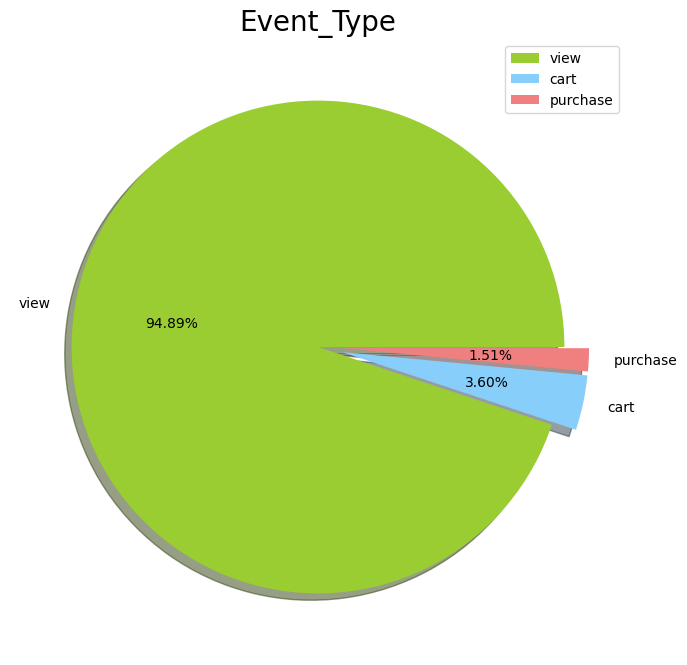

In [14]:
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## event_type = "purchase", what item do customers buy?

In [15]:
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
603,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


## What brands the customers buy?

In [16]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,370376
apple,308258
xiaomi,104504
huawei,46760
oppo,25971
lg,19659
acer,13284
artel,11986
lenovo,11124


# Modeling: predict at time of addition to shopping cart if user will purchase a given product or not
### Feature engineering

Restructure the data to feed into the machine learning model. For this use case, I only target the data which customers have "put" the product in the cart.

Furthermore, I add some new features into the training data set:

- category_code_level1: category
- category_code_level2: sub-category
- event_weekday: weekday of the event
- activity_count: number of activity in that session
- is_purchased: whether the put in cart item is purchased

Thus, the training data set contains every non-duplicated cart transaction (within the same session, I only keep one record for a particular product in the cart) with above mentioned new feature. I will use those features, including the original price and brand to predict whether customers will eventually purchase the item in the cart.

In [17]:
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [18]:
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]

**Prepare a dataframe for counting activity in the session**

In [19]:

activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [20]:
del d # free memory

In [21]:

df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,1.0,1,electronics,smartphone,4.0
1,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,0.0,1,electronics,audio,4.0
2,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,0.0,1,electronics,smartphone,7.0
3,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,1.0,1,electronics,smartphone,16.0
4,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,1.0,1,electronics,smartphone,10.0


## Save new data structure for modeling

In [22]:
df_targets.to_csv('training_data.csv')

In [6]:
import pandas as pd

# Define dtypes manually to reduce memory usage
dtypes = {
    'event_type': 'category',
    'product_id': 'int32',
    'category_id': 'int32',
    'category_code': 'category',
    'brand': 'category',
    'price': 'float32',
    'user_id': 'int32',
    'user_session': 'category',
    'is_purchased': 'float32',
    'event_weekday': 'category',
    'category_code_level1': 'category',
    'category_code_level2': 'category',
    'activity_count': 'float32'
}

# Load with low_memory and usecols if needed
df_targets = pd.read_csv(
    'training_data.csv',
    dtype=dtypes,
    parse_dates=['event_time'],
    low_memory=True
)

print(f"Loaded dataframe with shape: {df_targets.shape}")
print(df_targets.info(memory_usage='deep'))


Loaded dataframe with shape: (1955166, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955166 entries, 0 to 1955165
Data columns (total 15 columns):
 #   Column                Dtype              
---  ------                -----              
 0   Unnamed: 0            int64              
 1   event_time            datetime64[ns, UTC]
 2   event_type            category           
 3   product_id            int32              
 4   category_id           int32              
 5   category_code         category           
 6   brand                 category           
 7   price                 float32            
 8   user_id               int32              
 9   user_session          category           
 10  is_purchased          float32            
 11  event_weekday         category           
 12  category_code_level1  category           
 13  category_code_level2  category           
 14  activity_count        float32            
dtypes: category(7), datetime64[ns, UTC](1), 

In [8]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955166 entries, 0 to 1955165
Data columns (total 15 columns):
 #   Column                Dtype              
---  ------                -----              
 0   Unnamed: 0            int64              
 1   event_time            datetime64[ns, UTC]
 2   event_type            category           
 3   product_id            int32              
 4   category_id           int32              
 5   category_code         category           
 6   brand                 category           
 7   price                 float32            
 8   user_id               int32              
 9   user_session          category           
 10  is_purchased          float32            
 11  event_weekday         category           
 12  category_code_level1  category           
 13  category_code_level2  category           
 14  activity_count        float32            
dtypes: category(7), datetime64[ns, UTC](1), float32(3), int32(3), int64(1)
memory usage

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

## Resampling training set

In [10]:
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

796772

In [11]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

1158394

In [46]:
n_samples = 796772
is_purchase_downsampled = resample(is_purcahase_set,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 27)

In [47]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

is_purchased
1.0    796772
0.0    796772
Name: count, dtype: int64

In [48]:
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

## Encode categorical variables

In [49]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

C:\Users\malak\AppData\Local\Temp\ipykernel_15116\2885472262.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  76  758   98 ...   76 1117 1117]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
C:\Users\malak\AppData\Local\Temp\ipykernel_15116\2885472262.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 3 6 ... 0 4 4]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
C:\Users\malak\AppData\Local\Temp\ipykernel_15116\2885472262.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 2 4 ..

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
54096,76,462.410004,4,7,40,4.0
279331,758,89.379997,3,2,26,0.0
1336489,98,1286.979980,6,4,29,0.0
14173,1117,1181.430054,2,7,40,6.0
656133,1414,437.329987,4,2,18,6.0


In [50]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']


## Split the data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

## Train the model

In [52]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)  # 💥 this fails if y_test has unseen labels

In [53]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure columns in test match train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [54]:
from xgboost import XGBClassifier

# Train the XGBoost model using sparse matrix
model = XGBClassifier(
    tree_method='approx',  # Faster and more memory-efficient for large data
    n_jobs=1,              # Use 1 core to reduce memory load
    verbosity=1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


C:\Users\malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:56:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6773151711904682
Precision: 0.6489660409345366
Recall: 0.7700350768379718
fbeta: 0.678587074394751


## Feature importance

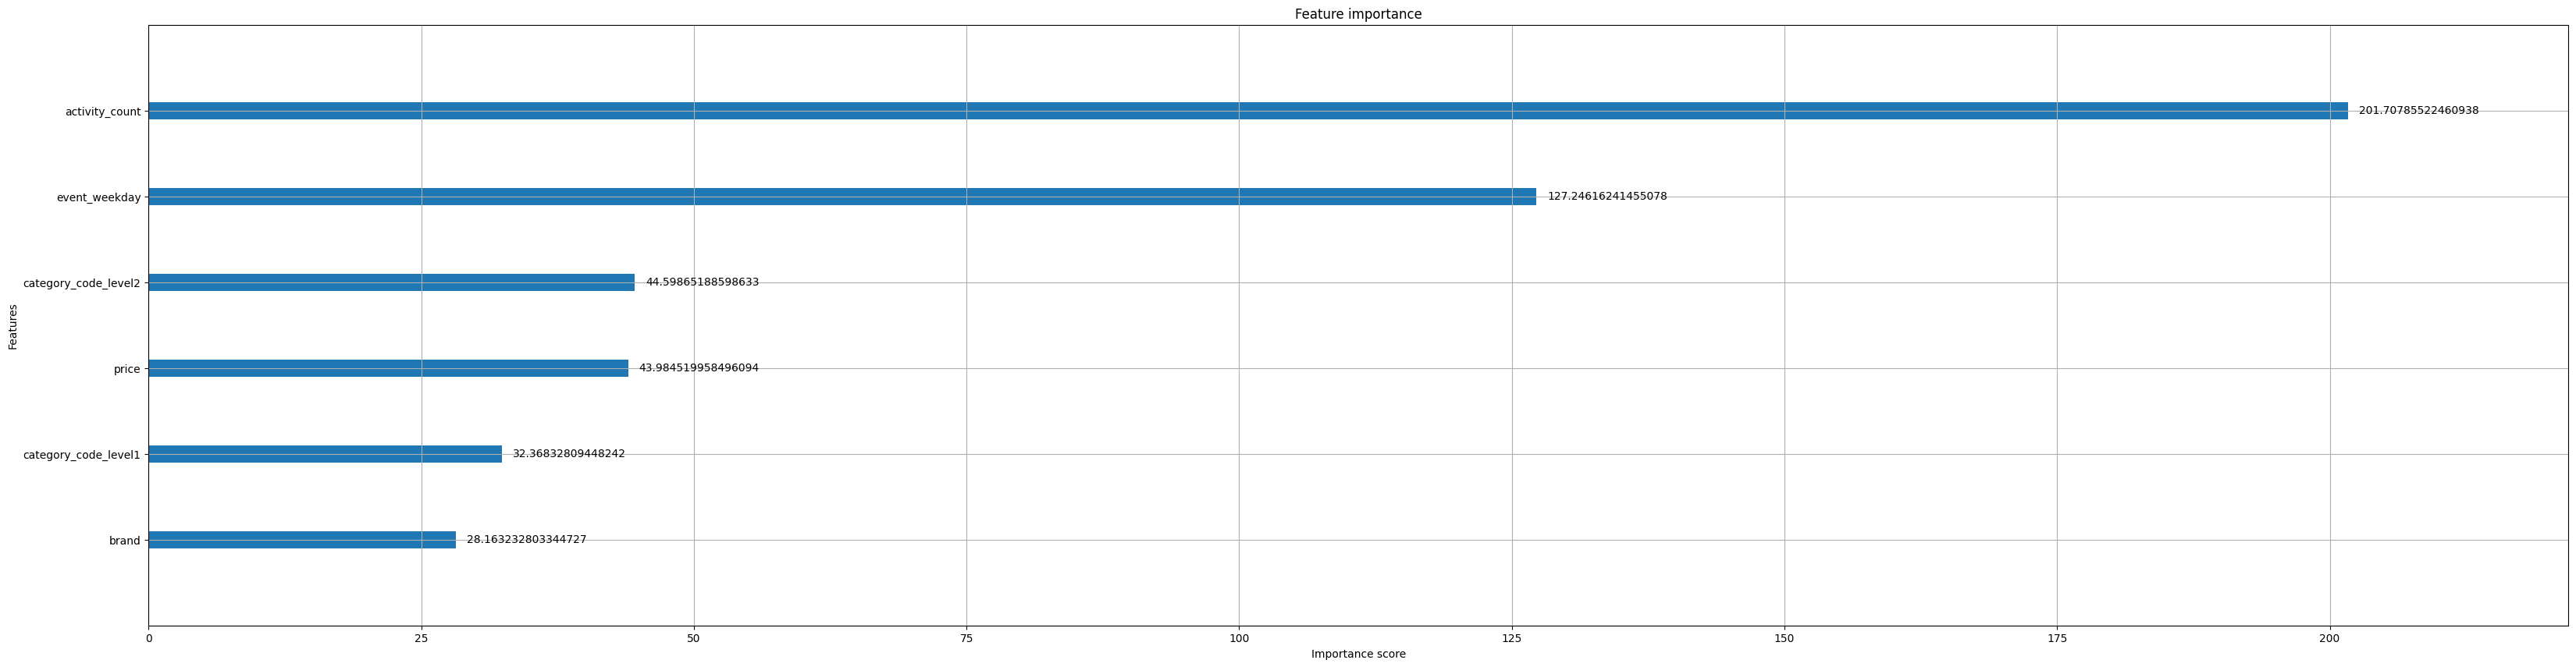

In [56]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()

In [63]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    colsample_bytree=0.9,
    subsample=0.8,
    random_state=42,
    class_weight='balanced'
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(50)]
)

[LightGBM] [Info] Number of positive: 558153, number of negative: 557327
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 1115480, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.607096
[100]	valid_0's binary_logloss: 0.596193
[150]	valid_0's binary_logloss: 0.592326
[200]	valid_0's binary_logloss: 0.590091
[250]	valid_0's binary_logloss: 0.588661
[300]	valid_0's binary_logloss: 0.587608
[350]	valid_0's binary_logloss: 0.586908
[400]	valid_0's binary_logloss: 0.586201
[450]	valid_0's binary_logloss: 0.585587
[500]	valid_0

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9,
               learning_rate=0.05, n_estimators=1000, random_state=42,
               subsample=0.8)

In [64]:
from sklearn.metrics import accuracy_score

# Predict on test set (for binary classification)
y_pred = model.predict(X_test)

# For LightGBM, predictions might be probabilities; if so, convert to class labels:
# y_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.6785


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple feedforward neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=1024,
    verbose=2
)

# Predict and evaluate
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Test Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1090/1090 - 9s - 9ms/step - accuracy: 0.6096 - loss: 0.6597 - val_accuracy: 0.6209 - val_loss: 0.6472
Epoch 2/20
1090/1090 - 6s - 6ms/step - accuracy: 0.6244 - loss: 0.6458 - val_accuracy: 0.6397 - val_loss: 0.6357
Epoch 3/20
1090/1090 - 10s - 9ms/step - accuracy: 0.6388 - loss: 0.6354 - val_accuracy: 0.6495 - val_loss: 0.6230
Epoch 4/20
1090/1090 - 7s - 6ms/step - accuracy: 0.6404 - loss: 0.6294 - val_accuracy: 0.6500 - val_loss: 0.6186
Epoch 5/20
1090/1090 - 6s - 6ms/step - accuracy: 0.6419 - loss: 0.6259 - val_accuracy: 0.6504 - val_loss: 0.6161
Epoch 6/20
1090/1090 - 6s - 6ms/step - accuracy: 0.6429 - loss: 0.6229 - val_accuracy: 0.6514 - val_loss: 0.6134
Epoch 7/20
1090/1090 - 7s - 6ms/step - accuracy: 0.6441 - loss: 0.6205 - val_accuracy: 0.6506 - val_loss: 0.6128
Epoch 8/20
1090/1090 - 6s - 6ms/step - accuracy: 0.6449 - loss: 0.6192 - val_accuracy: 0.6501 - val_loss: 0.6134
Epoch 9/20
1090/1090 - 6s - 6ms/step - accuracy: 0.6457 - loss: 0.6182 - val_accuracy: 0.6510 -

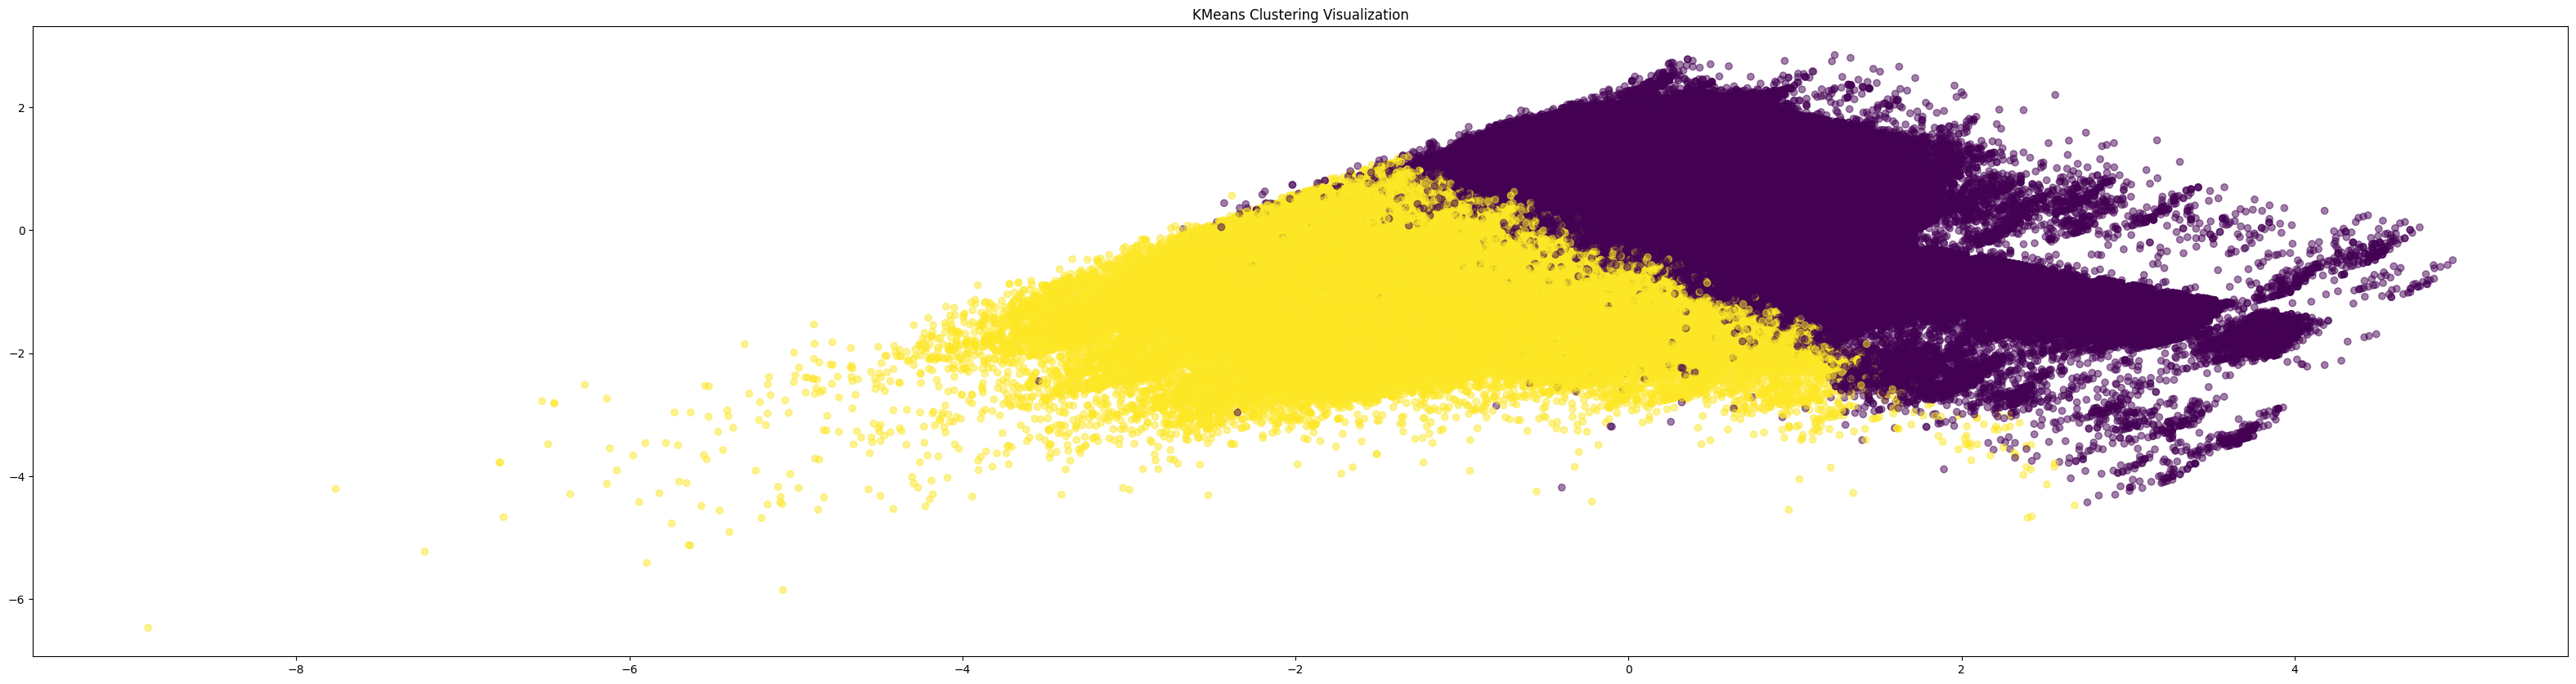

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# For clustering, scale data (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # or use all data

# Choose number of clusters, e.g., 2 for binary
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Optional: visualize clusters (if 2D or reduce dims first)
# Example: PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("KMeans Clustering Visualization")
plt.show()


Train Adjusted Rand Index (ARI): 0.0062
Train Normalized Mutual Information (NMI): 0.0053
Test Adjusted Rand Index (ARI): 0.0062
Test Normalized Mutual Information (NMI): 0.0054


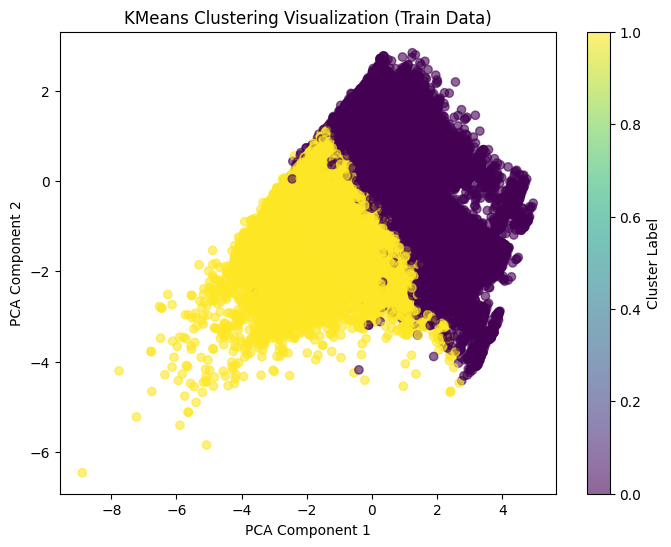

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X and y are already defined (feature matrix and true labels)

# Scale features (using train data scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose number of clusters (use number of unique labels in full data or train data)
n_clusters = len(set(y_train))

# Fit KMeans on scaled train data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_train = kmeans.fit_predict(X_train_scaled)

# Evaluate clustering on train set
ari_train = adjusted_rand_score(y_train, clusters_train)
nmi_train = normalized_mutual_info_score(y_train, clusters_train)
print(f"Train Adjusted Rand Index (ARI): {ari_train:.4f}")
print(f"Train Normalized Mutual Information (NMI): {nmi_train:.4f}")

# Optional: Predict clusters for test set and evaluate
clusters_test = kmeans.predict(X_test_scaled)
ari_test = adjusted_rand_score(y_test, clusters_test)
nmi_test = normalized_mutual_info_score(y_test, clusters_test)
print(f"Test Adjusted Rand Index (ARI): {ari_test:.4f}")
print(f"Test Normalized Mutual Information (NMI): {nmi_test:.4f}")

# Visualize clusters in 2D using PCA on scaled train data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters_train, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering Visualization (Train Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Assume X_train, y_train, X_val, y_val are ready
# Also, y_train and y_val are one-hot encoded or integer encoded for classification

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='softmax')  # use sigmoid for binary classification
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # or 'binary_crossentropy' for 2 classes
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\malak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17430/17430 - 65s - 4ms/step - accuracy: 0.5422 - loss: 0.6900 - val_accuracy: 0.5620 - val_loss: 0.6848
Epoch 2/100
17430/17430 - 62s - 4ms/step - accuracy: 0.5617 - loss: 0.6818 - val_accuracy: 0.6049 - val_loss: 0.6660
Epoch 3/100
17430/17430 - 60s - 3ms/step - accuracy: 0.6004 - loss: 0.6633 - val_accuracy: 0.6060 - val_loss: 0.6558
Epoch 4/100
17430/17430 - 61s - 4ms/step - accuracy: 0.6094 - loss: 0.6574 - val_accuracy: 0.6149 - val_loss: 0.6529
Epoch 5/100
17430/17430 - 61s - 4ms/step - accuracy: 0.6131 - loss: 0.6552 - val_accuracy: 0.6095 - val_loss: 0.6548
Epoch 6/100
17430/17430 - 60s - 3ms/step - accuracy: 0.6134 - loss: 0.6548 - val_accuracy: 0.6225 - val_loss: 0.6465
Epoch 7/100
17430/17430 - 60s - 3ms/step - accuracy: 0.6161 - loss: 0.6536 - val_accuracy: 0.6177 - val_loss: 0.6522
Epoch 8/100
17430/17430 - 60s - 3ms/step - accuracy: 0.6167 - loss: 0.6529 - val_accuracy: 0.6259 - val_loss: 0.6463
Epoch 9/100
17430/17430 - 97s - 6ms/step - accuracy: 0.6178 - lo

KeyboardInterrupt: 